# Houston, TX Regressions
Regressions to compare E+ v9.2 and v9.5 outputs 

In [63]:
# Dependencies
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---

## Monthly

In [6]:
#hou_monthly95=pd.read_csv("../Regression_Scraper_Output/hou_monthly95_data.csv")

In [7]:
#hou_monthly92=pd.read_csv("../Regression_Scraper_Output/hou_monthly92_data.csv")

------

## Hourly Data

In [33]:
# Import the scraped data
hou_hourly95=pd.read_csv("../Regression_Scraper_Output/hou_hourly95_data.csv")
#hou_hourly95

In [23]:
hou_hourly92=pd.read_csv("../Regression_Scraper_Output/hou_hourly92_data.csv")
#hou_hourly92

In [24]:
performance=pd.read_csv("data/para_values.csv")
#performance

In [133]:
# Merge the csv with the with the window performance attributes

hou_hourly95_all = pd.merge(hou_hourly95, performance, on="Scenario")
hou_hourly95_all.dtypes

Scenario                 int64
Date_Time               object
Illuminance(lux)       float64
FanEnergy(kBtu)        float64
HeatingEnergy(kBtu)    float64
CoolingEnergy(kBtu)    float64
FanCost($)             float64
HeatingCost($)         float64
CoolingCost($)         float64
Month                    int64
Day                      int64
Hour                    object
HourlyEnergy(kBtu)     float64
HourlyCost($)          float64
U-factor               float64
SHGC                   float64
dtype: object

In [30]:
hou_hourly92_all = pd.merge(hou_hourly92, performance, on="Scenario")
#hou_hourly92_all

------

## Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

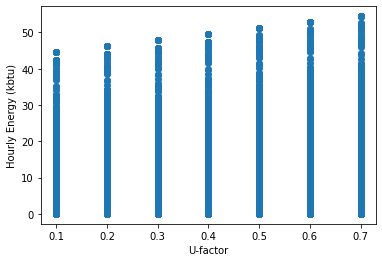

In [53]:
# 95 Hourly energy vs U-factor
plt.scatter(hou_hourly95_all.iloc[:,14], hou_hourly95_all.iloc[:,12])
plt.xlabel("U-factor")
plt.ylabel("Hourly Energy (kbtu)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

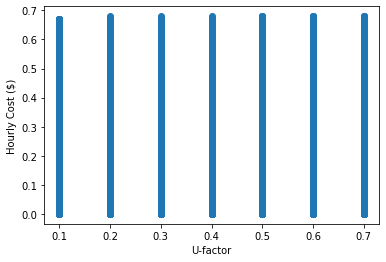

In [51]:
# 95 Hourly cost vs U-factor
plt.scatter(hou_hourly95_all.iloc[:,14], hou_hourly95_all.iloc[:,13])
plt.xlabel("U-factor")
plt.ylabel("Hourly Cost ($)")
plt.show

## Train the 95 energy model

In [141]:
# Drop unwanted columns, keep energy, U and SHGC
hou_hourly95_clean = hou_hourly95_all[["HourlyEnergy(kBtu)", "U-factor", "SHGC"]]

In [142]:
# Define X and Y

X95 = hou_hourly95_clean.drop("HourlyEnergy(kBtu)", axis = 1)
y95 = hou_hourly95_clean[["HourlyEnergy(kBtu)"]]

y95

,HourlyEnergy(kBtu)
0,14.35
1,15.77
2,17.02
3,18.22
4,18.80
...,...
429235,0.00
429236,0.00
429237,0.74
429238,6.19


In [143]:
#Train, test, split
X95_train, X95_test, y95_train, y95_test = train_test_split(X95, y95, test_size=.2, random_state=1)

In [144]:
# Create an instance
regression_model = LinearRegression()

In [145]:
# Fit the model
regression_model.fit(X95_train, y95_train)

LinearRegression()

In [146]:
# Get the intercept and the coefficients
intercept95 = regression_model.intercept_[0]
coef95 = regression_model.coef_[0]

print("The intercept for the model is {:.4}".format(intercept))
print("-"*100)

#loop through and print the data
for cf in zip(X95.columns, coef95):
    print("The coefficient for {} is {:2}".format(cf[0],cf[1]))

The intercept for the model is 8.415e-05
----------------------------------------------------------------------------------------------------
The coefficient for U-factor is 1.7181760067019207
The coefficient for SHGC is 1.512926322466252


## Train the 92 model

In [154]:
# Drop unwanted columns, keep energy, U and SHGC
hou_hourly92_clean = hou_hourly92_all[["HourlyEnergy(kBtu)", "U-factor", "SHGC"]]

In [156]:
# Define X and Y

X92 = hou_hourly92_clean.drop("HourlyEnergy(kBtu)", axis = 1)
y92 = hou_hourly92_clean[["HourlyEnergy(kBtu)"]]

y92

,HourlyEnergy(kBtu)
0,14.39
1,15.80
2,17.04
3,18.23
4,18.80
...,...
429235,0.00
429236,0.00
429237,0.74
429238,6.21


In [157]:
#Train, test, split
X92_train, X92_test, y92_train, y92_test = train_test_split(X92, y92, test_size=.2, random_state=1)

In [158]:
# Create an instance
regression_model = LinearRegression()

In [159]:
# Fit the model
regression_model.fit(X92_train, y92_train)

LinearRegression()

In [160]:
# Get the intercept and the coefficients
intercept92 = regression_model.intercept_[0]
coef92 = regression_model.coef_[0]

print("The intercept for the model is {:.4}".format(intercept))
print("-"*100)

#loop through and print the data
for cf in zip(X92.columns, coef92):
    print("The coefficient for {} is {:2}".format(cf[0],cf[1]))

The intercept for the model is 8.415e-05
----------------------------------------------------------------------------------------------------
The coefficient for U-factor is 1.7888466758747694
The coefficient for SHGC is 1.4096867965705093
